In [1]:
import numpy as np
import scipy
import os
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd
import sys

In [2]:
def compute_power_db(x, Fs, win_len_sec=0.1, power_ref=10**(-12)):
    """Computation of the signal power in dB

    Notebook: C1/C1S3_Dynamics.ipynb

    Args:
        x (np.ndarray): Signal (waveform) to be analyzed
        Fs (scalar): Sampling rate
        win_len_sec (float): Length (seconds) of the window (Default value = 0.1)
        power_ref (float): Reference power level (0 dB) (Default value = 10**(-12))

    Returns:
        power_db (np.ndarray): Signal power in dB
    """
    win_len = round(win_len_sec * Fs)
    win = np.ones(win_len) / win_len
    power_db = 10 * np.log10(np.convolve(x**2, win, mode='same') / power_ref)
    return power_db

Fs = 22050
x, Fs = librosa.load('data/beethoven.mp3', sr=Fs)
win_len_sec = 0.2
power_db = compute_power_db(x, win_len_sec=win_len_sec, Fs=Fs)

In [33]:
max_index = 100*Fs

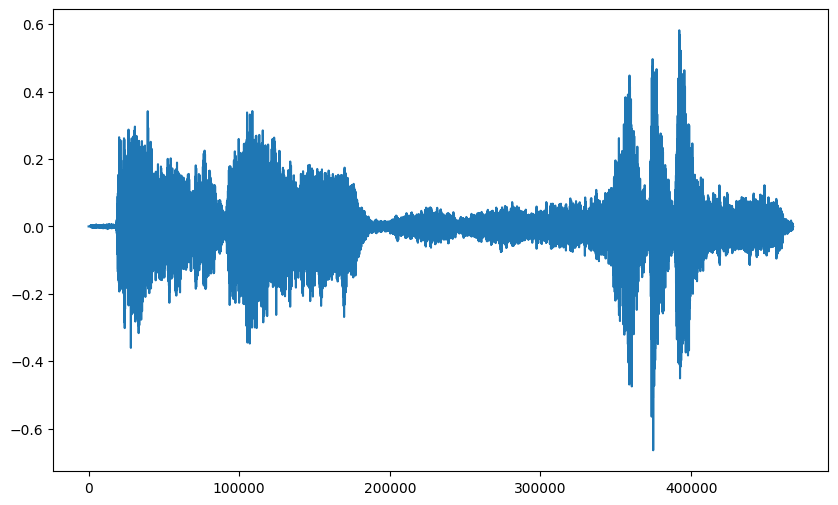

In [34]:
plt.figure(figsize=(10,6))
# librosa.display.waveshow(x[:3 * Fs], sr=Fs, color='blue', x_axis='frames')
plt.plot(x[:max_index])
plt.show()

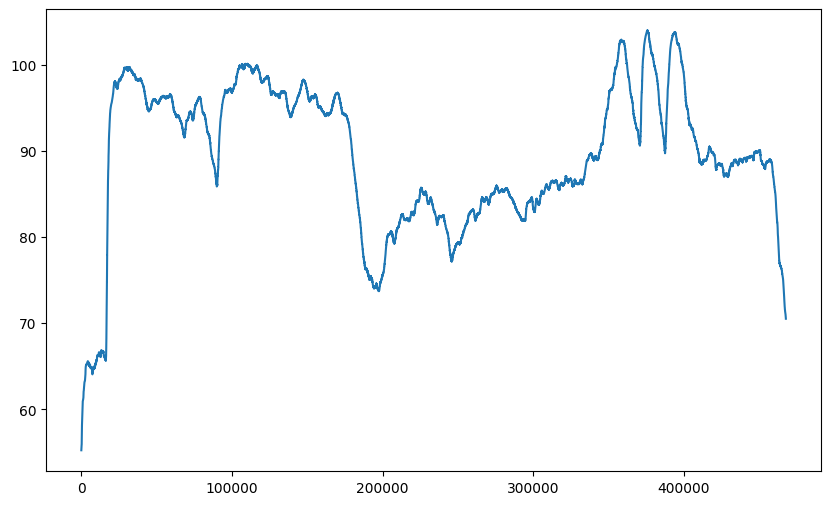

In [35]:
plt.figure(figsize=(10,6))
plt.plot(power_db[:max_index])
plt.show()

In [36]:
loudness = (power_db - power_db.min()) / (power_db.max() - power_db.min())

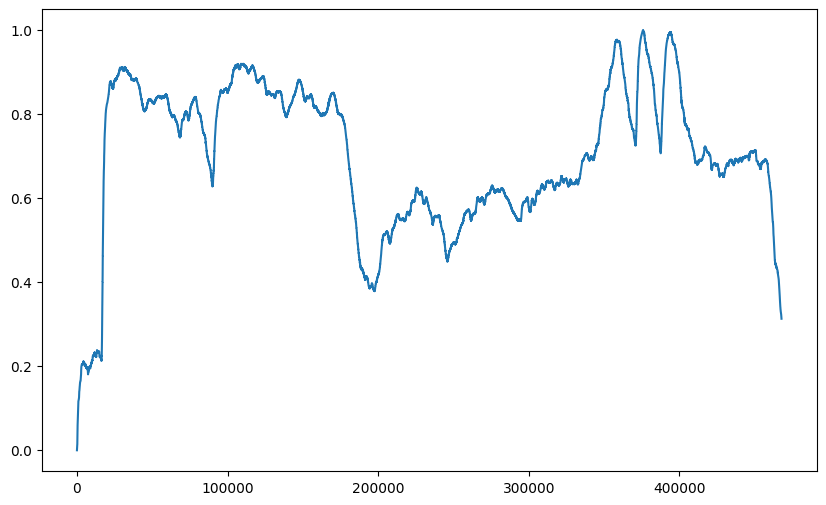

In [37]:
plt.figure(figsize=(10,6))
plt.plot(loudness[:max_index])
plt.show()